In [1]:
pip install fiona

     |████████████████████████████████| 15.4 MB 39 kB/s 


In [2]:
#import required packages
import fiona
import pandas as pd

<hr/> 

### Create point shapefile

In [3]:
#import points from csv file
pointDf = pd.read_csv('/content/cropPoints.csv',header=0)
pointDf.head()

,X,Y,Name
0,-84.200969,9.480966,Plant1
1,-84.200841,9.480931,Plant2
2,-84.201841,9.481167,Plant3
3,-84.200862,9.479898,Plant4
4,-84.200657,9.479586,Plant5


In [4]:
# define schema
schema = {
    'geometry':'Point',
    'properties':[('Name','str')]
}


In [6]:
#open a fiona object
pointShp = fiona.open('/content/cropPoints.shp', mode='w', driver='ESRI Shapefile',
          schema = schema, crs = "EPSG:4326")

In [7]:
#iterate over each row in the dataframe and save record
for index, row in pointDf.iterrows():
    rowDict = {
        'geometry' : {'type':'Point',
                     'coordinates': (row.X,row.Y)},
        'properties': {'Name' : row.Name},
    }
    pointShp.write(rowDict)
#close fiona object
pointShp.close()

<hr/> 

### Create line shapefile

In [8]:
#import line vertex from csv file
lineDf = pd.read_csv('/content/cropLine.csv',header=0)
lineDf.head(10)

,X,Y,Name
0,-84.201990,9.480380,Row1
1,-84.201928,9.480319,Row1
2,-84.201871,9.480261,Row1
3,-84.201820,9.480199,Row1
4,-84.201756,9.480133,Row1
5,-84.201702,9.480071,Row1
6,-84.201650,9.480018,Row1
7,-84.201592,9.479954,Row1
8,-84.201536,9.479890,Row1


In [10]:
# define schema
schema = {
    'geometry':'LineString',
    'properties':[('Name','str')]
}

In [12]:
#open a fiona object
lineShp = fiona.open('/content/cropLine.shp', mode='w', driver='ESRI Shapefile',
          schema = schema, crs = "EPSG:4326")

In [13]:
#get list of points
xyList = []
rowName = ''
for index, row in lineDf.iterrows():
    xyList.append((row.X,row.Y))
    rowName = row.Name
xyList[:10]

[(-84.20199048930691, 9.48038022019686),
 (-84.2019279965972, 9.480319262464471),
 (-84.2018711206848, 9.48026145133191),
 (-84.2018196550243, 9.48019910289781),
 (-84.20175590920171, 9.48013268586072),
 (-84.2017022617913, 9.48007149365889),
 (-84.20164992658809, 9.480017956049949),
 (-84.20159176810151, 9.479953587860349),
 (-84.2015358504455, 9.47989025875836)]

In [14]:
#save record and close shapefile
rowDict = {
'geometry' : {'type':'LineString',
                 'coordinates': xyList},
'properties': {'Name' : rowName},
}
lineShp.write(rowDict)
#close fiona object
lineShp.close()

<hr/> 

### Create polygon shapefile

In [15]:
#import line vertex from csv file
polyDf = pd.read_csv('/content/cropPoly.csv',header=0)
polyDf.head()

,X,Y,Name
0,-84.202396,9.480334,Border1
1,-84.202190,9.480555,Border1
2,-84.201886,9.480792,Border1
3,-84.201529,9.481153,Border1
4,-84.201307,9.481303,Border1


In [16]:
#show the last item
polyDf.tail()

,X,Y,Name
19,-84.201742,9.479385,Border1
20,-84.201863,9.479413,Border1
21,-84.202157,9.479673,Border1
22,-84.202398,9.479917,Border1
23,-84.202396,9.480334,Border1


In [17]:
# define schema
schema = {
    'geometry':'Polygon',
    'properties':[('Name','str')]
}

In [18]:
#open a fiona object
polyShp = fiona.open('/content/cropPoly.shp', mode='w', driver='ESRI Shapefile',
          schema = schema, crs = "EPSG:4326")

In [19]:
#get list of points
xyList = []
rowName = ''
for index, row in polyDf.iterrows():
    xyList.append((row.X,row.Y))
    rowName = row.Name
xyList[:5]

[(-84.20239642444, 9.48033431305493),
 (-84.20218992317409, 9.48055508704213),
 (-84.20188647832009, 9.48079161161365),
 (-84.2015288437831, 9.48115260231102),
 (-84.20130718506941, 9.4813034753504)]

In [20]:
#save record and close shapefile
rowDict = {
'geometry' : {'type':'Polygon',
                 'coordinates': [xyList]}, #Here the xyList is in brackets
'properties': {'Name' : rowName},
}
polyShp.write(rowDict)
#close fiona object
polyShp.close()

In [21]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 29.6 MB/s 
     |████████████████████████████████| 6.3 MB 35.7 MB/s 


In [22]:
import geopandas as gpd

# Read shapefiles
cp_poly = gpd.read_file("/content/cropPoly.shp")
cp_lines = gpd.read_file("/content/cropLine.shp")
cp_points = gpd.read_file("/content/cropPoints.shp")

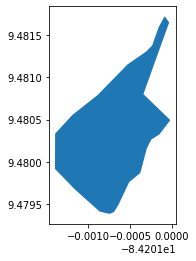

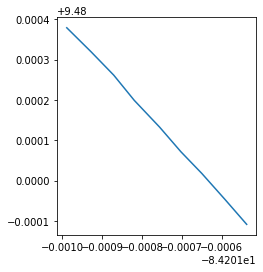

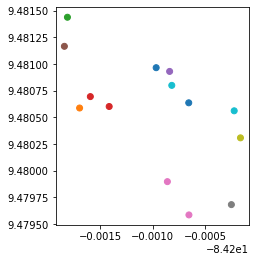

In [23]:
# Plot the dhape files individually
cp_poly.plot(column="Name")
cp_lines.plot(column="Name")
cp_points.plot(column="Name")

(-84.20251004688515, -84.20005556100153, 9.47926810307702, 9.4818392947777)

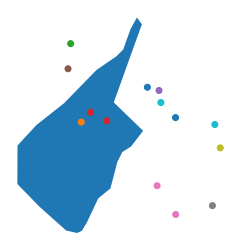

In [24]:
import matplotlib.pyplot as plt
# plot the shapefiles as subplots
fig, ax = plt.subplots(figsize=(4,6))
cp_poly.plot(ax=ax, column="Name")
cp_lines.plot(ax=ax, column="Name")
cp_points.plot(ax=ax, column="Name")

ax.axis('off')